In [1]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
import nltk
from pandas import DataFrame
from string import punctuation
# import statistics
from math import log2
import re
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Classifier by features

In [3]:
!wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/raw/main/data.zip

--2021-12-10 15:48:29--  https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/raw/main/data.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/main/data.zip [following]
--2021-12-10 15:48:29--  https://raw.githubusercontent.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/main/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211042 (206K) [application/zip]
Saving to: ‘data.zip.2’

data.zip.2          100%[===================>] 206.10K  --.-KB/s    in 0.003s  

2021-12-10 15:48:29 (65.8 MB/s) - ‘data.zip.2’ saved [211042/211042]



In [4]:
! unzip data.zip 

Archive:  data.zip
replace sample_output.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_output.csv       
  inflating: train_test.csv          
  inflating: evaluate.csv            


In [5]:
! ls

99210323_eval_output_Features.csv  data.zip.2	 sample_data
data.zip			   eval.csv	 sample_output.csv
data.zip.1			   evaluate.csv  train_test.csv


In [6]:
data = pd.read_csv('train_test.csv') #Read Dataset for features
# data_f = data_f.rename(columns={"type": "type1", "text":"text1"})
data.head()

,type,text
0,ham,"Fighting with the world is easy, u either win ..."
1,ham,When can Ì_ come out?
2,ham,Check with nuerologist.
3,ham,Lolnice. I went from a fish to ..water.?
4,spam,+123 Congratulations - in this week's competit...


In [7]:
# data_f['type'].value_counts(normalize=True)

In [8]:
train_ratio = 0.8
data_2 = data.sample(frac=1, random_state=1)
training_test_index = round(len(data_2) * train_ratio)
train = data_2[:training_test_index].reset_index(drop=True)
test = data_2[training_test_index:].reset_index(drop=True)
print('train: ',train.shape,'\ntest: ',test.shape)

train:  (4058, 2) 
test:  (1014, 2)


In [9]:
x = train['type'].value_counts(normalize=True)
x.ham , x.spam 

(0.8639724001971415, 0.13602759980285856)

In [10]:
y = test['type'].value_counts(normalize=True)
y.ham , y.spam

(0.8777120315581854, 0.1222879684418146)

In [11]:
int(100*x.spam/(x.spam+x.ham)) , int(100*y.spam/(y.spam+y.ham)) 

(13, 12)

## preprocessing using NLTK

normalization

In [12]:
org_train = train

In [13]:
#functions:
def remove_whitespace(text):
    return  " ".join(text.split())
def lower_ratio(text):
    return sum(map(str.islower, text))/(len(text)+1)
def punctuation_ration(text):
    tokenizer = RegexpTokenizer(r"\w+")
    text1=tokenizer.tokenize(' '.join(text.split()))
    return round((len(text)-len(text1))/(len(text)+1),2)
def href_ratio(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    x = url_pattern.sub(r'', text)
    return round((len(text)-len(x))/(len(text)+1),2) 
def number_ratio(text):
    x = re.sub(r'\d+', '', text)
    return (len(text)-len(x))/(len(text)+1)
def count_alphabet(text):
    count = 0
    alph = string.ascii_lowercase
    for ch in text:
        if ch in alph:
            count = count + 1
    return count
def num_of_sentences(text):
  sentences = nltk.sent_tokenize(text)
  return len(sentences)
def num_of_words_per_sentence_avg(text):
  sentences = nltk.sent_tokenize(text)
  c = 1
  sum_ = 0
  for sentence in sentences:
    sum_ += len(nltk.word_tokenize(sentence))
    c += 1
  return round(sum_/c,2) 


0.82


In [14]:
def normalizer(df):
  df['lowerRatio'] = df['text'].apply(lower_ratio)
  df['puctuationRatio'] = df['text'].apply(punctuation_ration)
  df['hrefRatio'] = df['text'].apply(href_ratio)
  df['numberRatio'] = df['text'].apply(number_ratio)
  df['normalized'] = df['text'].str.lower()
  df['normalized'] = df['normalized'].apply(remove_whitespace)
  df['count_alphabet'] = df['normalized'].apply(lambda text : count_alphabet(text))
  df['num_of_sentences'] = df['normalized'].apply(num_of_sentences)
  df['num_of_words_per_sentence_avg'] = df['normalized'].apply(num_of_sentences)

  return df

# train = org_train
train = normalizer(train)
train.head()

,type,text,lowerRatio,puctuationRatio,hrefRatio,numberRatio,normalized,count_alphabet,num_of_sentences,num_of_words_per_sentence_avg
0,ham,Watch lor. I saw a few swatch one i thk quite ...,0.636364,0.76,0.0,0.045455,watch lor. i saw a few swatch one i thk quite ...,59,2,2
1,ham,R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO ...,0.000000,0.72,0.0,0.017544,r u &sam p in eachother. if we meet we can go ...,39,2,2
2,ham,No just send to you. Bec you in temple na.,0.674419,0.74,0.0,0.000000,no just send to you. bec you in temple na.,31,2,2
3,ham,How u doin baby girl ?? hope u are okay every ...,0.693878,0.76,0.0,0.000000,how u doin baby girl ?? hope u are okay every ...,71,3,3
4,ham,No da:)he is stupid da..always sending like th...,0.747573,0.80,0.0,0.000000,no da:)he is stupid da..always sending like th...,78,1,1


In [15]:
col_name = []
for i in train.columns:
  col_name.append(i)
feature_name = col_name[2:] 
feature_name.remove("normalized")
for f in feature_name:
  print(f)

lowerRatio
puctuationRatio
hrefRatio
numberRatio
count_alphabet
num_of_sentences
num_of_words_per_sentence_avg


In [16]:
spam = train[train['type'] == 'spam']
ham = train[train['type'] == 'ham']

p  = {}
p["spam"] = len(spam) / len(train)
p["ham"] = len(ham) / len(train)

avg_spam = {}
avg_ham = {}
for f in feature_name:
  avg_spam[f] = spam[f].mean() 
  avg_ham[f] = ham[f].mean()

In [17]:
print(avg_spam)
print(avg_ham)

{'lowerRatio': 0.5579072696931758, 'puctuationRatio': 0.8069927536231878, 'hrefRatio': 0.020000000000000004, 'numberRatio': 0.11481639497881395, 'count_alphabet': 93.42753623188406, 'num_of_sentences': 2.8405797101449277, 'num_of_words_per_sentence_avg': 2.8405797101449277}
{'lowerRatio': 0.6767222687958733, 'puctuationRatio': 0.7719338277239017, 'hrefRatio': 3.1374786081003995e-05, 'numberRatio': 0.003926079506578657, 'count_alphabet': 53.625213918996, 'num_of_sentences': 1.7501426126640045, 'num_of_words_per_sentence_avg': 1.7501426126640045}


In [18]:
feature_name

['lowerRatio',
 'puctuationRatio',
 'hrefRatio',
 'numberRatio',
 'count_alphabet',
 'num_of_sentences',
 'num_of_words_per_sentence_avg']

In [19]:
def input_normalizer_(text):
  lowerRatio = lower_ratio(text)
  puctuationRatio = punctuation_ration(text)
  hrefRatio = href_ratio(text)
  numberRatio = number_ratio(text)
  normalized = text.lower()
  normalized = remove_whitespace(normalized)
  count_alphabet_ = count_alphabet(normalized)
  num_of_sentences_ = num_of_sentences(normalized)
  num_of_words_per_sentence_avg = num_of_sentences(normalized)

  return {'lowerRatio':lowerRatio,'puctuationRatio':puctuationRatio,'hrefRatio':hrefRatio,
          'numberRatio':numberRatio,'count_alphabet':count_alphabet_,'num_of_sentences':num_of_sentences_,
          'num_of_words_per_sentence_avg':num_of_words_per_sentence_avg}

# # train = org_train

# sent_norm = input_normalizer_(sentence)
# sent_norm['count_alphabet']

In [46]:
def classify_test_set_(sentence,keys = ''):
   sent_norm = input_normalizer_(sentence)

   ps = p["spam"] 
   ph = p["ham"]
  #  print(ps,ph)
   if keys == '':
     keys = sent_norm.keys()
   for key in keys:
         difs = abs(sent_norm[key]-avg_spam[key]) + 0.1
         difh = abs(sent_norm[key]-avg_ham[key])  + 0.1
         sumdif = difs + difh 
         ps *= (difh/sumdif)
         ph *= (difs/sumdif)
         pst = ps
         ps = ps/(ps+ph)
         ph = ph/(pst+ph)
  #  print(ps,ph)
   if ph >= ps:
      return 'ham'
   else:
      return 'spam'

In [47]:
test['predicted'] = test['text'].apply(classify_test_set_)
# test.head()

In [48]:
correct = 0
total = test.shape[0]

tp= fp= tn= fn= 0
for row in test.iterrows():
  row = row[1]
  if row['type'] == row['predicted']:
      correct += 1
  if row['type'] == 'ham':
    if row['predicted'] == 'ham':
        tp+=1
    else:
        fn+=1
  else:
    if row['predicted'] == 'ham':
        fp+=1
    else:
        tn+=1

print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total)
print(tp,fp,tn,fn)

Correct: 909
Incorrect: 105
Accuracy: 0.8964497041420119
835 50 74 55


# eva;

In [49]:
eval = pd.read_csv('evaluate.csv')
eval.head()

,id,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,2,Ok lar... Joking wif u oni...
2,3,Free entry in 2 a wkly comp to win FA Cup fina...
3,4,U dun say so early hor... U c already then say...
4,5,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
eval['predicted'] = eval['text'].apply(classify_test_set_)
eval.head()

,id,text,predicted
0,1,"Go until jurong point, crazy.. Available only ...",ham
1,2,Ok lar... Joking wif u oni...,ham
2,3,Free entry in 2 a wkly comp to win FA Cup fina...,ham
3,4,U dun say so early hor... U c already then say...,ham
4,5,"Nah I don't think he goes to usf, he lives aro...",ham


In [51]:
del eval['text']
eval = eval.rename(columns={"predicted": "type"})
eval.head()

,id,type
0,1,ham
1,2,ham
2,3,ham
3,4,ham
4,5,ham


In [52]:
eval.to_csv('eval.csv',index=False)


In [53]:
from google.colab import files
files.download('eval.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Draw charts:

In [54]:
spamlist = []
hamlist = []
for f in feature_name:
   s = spam[f].mean()
   h = ham[f].mean()
   if s+h == 0:
     spamlist.append(0.5)
     hamlist.append(0.5)
   else:
     spamlist.append(s/(s+h))
     hamlist.append(h/(s+h))

In [55]:
import matplotlib.pyplot as plt


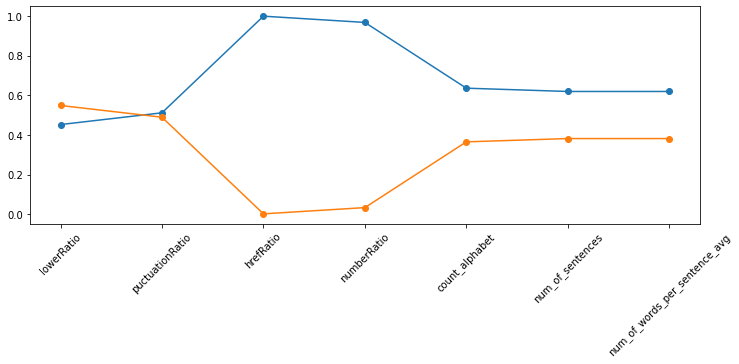

In [56]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)

x = feature_name
plt.plot(x,spamlist)
plt.plot(x,hamlist)
plt.scatter(x,spamlist)
plt.scatter(x,hamlist)
plt.xticks(rotation=45)
plt.show()

# confusion matrix and etc.

pos = 'ham' <br>
neg = 'spam'

In [57]:
correct = 0
total = test.shape[0]
tp=fp=tn=fn =0
for row in test.iterrows():
   row = row[1]
   if row['type'] == row['predicted']:
      correct += 1
   if row['type'] == 'ham':
     if row['predicted'] == 'ham':
        tp+=1
     else:
        fn+=1
   else:
     if row['predicted'] == 'ham':
        fp+=1
     else:
        tn+=1
print('tp=',tp,'fp=',fp,'tn=',tn,'fn=',fn)
print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total)

tp= 835 fp= 50 tn= 74 fn= 55
Correct: 909
Incorrect: 105
Accuracy: 0.8964497041420119


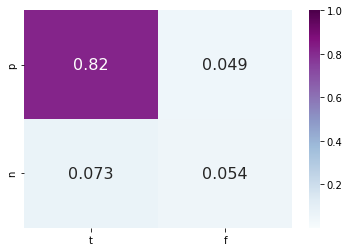

In [58]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

sum_ = tp+fp+tn+fn
array = [[tp/sum_,fp/sum_],[tn/sum_,fn/sum_]] 

df_cm = pd.DataFrame(array, ['p','n'], ['t','f'])
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16} , cmap="BuPu" , vmin=0.001, vmax=1)

plt.show()

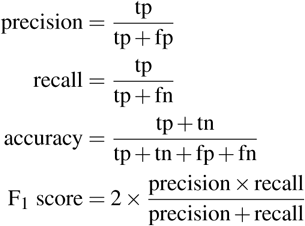

In [59]:
precision = tp / (tp+fp)
recall = tp / (tp+fn)
acc = (tp + tn) / (tp+tn+fp+fn)
f1score = 2 * precision * recall / (precision + recall)

In [60]:
print(precision,recall,acc,f1score)

0.943502824858757 0.9382022471910112 0.8964497041420119 0.9408450704225352


# ignore punctuationratio

In [61]:
feature_name2 = ['lowerRatio', 'hrefRatio', 'numberRatio', 'count_alphabet', 'num_of_sentences', 'num_of_words_per_sentence_avg']

In [65]:
def classify_test_set_2(sentence,keys = ''):
   sent_norm = input_normalizer_(sentence)

   ps = p["spam"] 
   ph = p["ham"]
  #  print(ps,ph)
   keys =  ['lowerRatio', 'hrefRatio', 'numberRatio', 'count_alphabet', 'num_of_sentences', 'num_of_words_per_sentence_avg']
   for key in keys:
         difs = abs(sent_norm[key]-avg_spam[key]) + 0.1
         difh = abs(sent_norm[key]-avg_ham[key])  + 0.1
         sumdif = difs + difh 
         ps *= (difh/sumdif)
         ph *= (difs/sumdif)
         pst = ps
         ps = ps/(ps+ph)
         ph = ph/(pst+ph)
  #  print(ps,ph)
   if ph >= ps:
      return 'ham'
   else:
      return 'spam'

In [66]:
spamlist = []
hamlist = []
for f in feature_name2:
   s = spam[f].mean()
   h = ham[f].mean()
   if s+h == 0:
     spamlist.append(0.5)
     hamlist.append(0.5)
   else:
     spamlist.append(s/(s+h))
     hamlist.append(h/(s+h))

In [67]:
test['predicted'] = test['text'].apply(classify_test_set_2)

In [68]:
correct = 0
total = test.shape[0]
tp=fp=tn=fn =0
for row in test.iterrows():
   row = row[1]
   if row['type'] == row['predicted']:
      correct += 1
   if row['type'] == 'ham':
     if row['predicted'] == 'ham':
        tp+=1
     else:
        fn+=1
   else:
     if row['predicted'] == 'ham':
        fp+=1
     else:
        tn+=1
print('tp=',tp,'fp=',fp,'tn=',tn,'fn=',fn)
print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total)

tp= 836 fp= 53 tn= 71 fn= 54
Correct: 907
Incorrect: 107
Accuracy: 0.8944773175542406
